Code adopted from https://github.com/markstrefford/Spiking-Neural-Network/blob/master/SNN_2.ipynb, but changed

### Set up the environment

In [43]:
import numpy as np
import sys
!{sys.executable} -m pip install python-mnist 
import matplotlib.pyplot as plt
import pandas as pd
import random
#import redis

from mnist.loader import MNIST

#matplotlib inline

In [44]:
from neurons import LIFNeuron as LIF
from utils import graph_results as graph, image_utils

###  Set up some parameters for the simulation

* Assume a consistent/single stimulus value for now that is applied for the duration of the simulation.
* Define the architecture of the SNN (layers, neurons per layer)

In [45]:
T         = 20   # total time to simulate (msec) 
dt        = 0.01 # Simulation timestep
time      = int(T / dt)
_T        = 1    # time per simulation step (so if _T is 1 and T is 20, then run T/_T steps)

stride = (4,2)   # TODO: This will be 4 on-centre neurons, 2 surround (off-centre) neurons
stride_size = stride[0] + stride[1]

debug=True

### Get an MNIST image

Start by getting an image from the MNIST dataset and render it

In [46]:
image, label = image_utils.get_next_image(pick_random = False)  #index=0)

Label: 5

............................
............................
............................
............................
............................
.....................@@.....
.............@@@@@@.@@......
........@@@@@@@@@@..........
........@@@@@@..@@..........
...........@@@..............
............@...............
............@...............
.............@..............
.............@@.............
..............@@@...........
................@@..........
.................@@.........
.................@@@........
.................@@@........
..............@@@@@.........
............@@@@@@..........
..........@@@@@.............
........@@@@@...............
......@@@@@@................
.....@@@@...................
............................
............................
............................


Render the image in each of it's retinal 'zones'

This will be the basis of what each retinal unit views as we progress.

Not that the pixels that will have the strongest stimuli are white (as they are closer to 1), areas of least stimuli are black (value close to 0).

Convolution Dimensions: x=7 / y=7


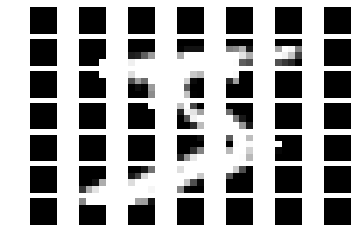

In [47]:
len_x , len_y=image_utils.graph_retinal_image(image, stride)

### Create SNN architecture

### Process the pixel stimulus for each retinal neuron

Process the image 1 pixel at a time

First create a set of neurons for each of the pixels. 
Assume 1-to-1 mapping, and no concept of a retinal unit. This will come later.

In [48]:
neurons = []
print('Creating {} x {} neurons'.format(len_x, len_y))
for y in range (0, len_y, 1):
    neuron_row=[]
    for x in range(0, len_x, 1):
        neuron_row.append(LIF.LIFNeuron(neuron_label="{}/{}".format(y,x), debug=debug))
    neurons.append(neuron_row)

Creating 28 x 28 neurons
LIFNeuron(0/0): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(0/1): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(0/2): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(0/3): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(0/4): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(0/5): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(0/6): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(0/7): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(0/8): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(0/9): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(0/10): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(0/11): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(0/12): Created Leaky Integrate and Fire neuron starting at time

In [49]:
start_x = 5
start_y = 5

print(len_x, len_y)

28 28


In [50]:
#for y in range(0, len_y, start_y + stride_size, 1):
#    for x in range(start_x, start_x + stride_size, 1):
for y in range(0, len_y, 1):
    for x in range(0, len_x, 1):
        stimulus = np.full((time), image[y,x])
        #print(np.shape(stimulus))
        print('Stimulus from image @ {}/{}: {}'.format(y, x, stimulus))
        print('Processing spike generator for neuron {}/{}: {}'.format(y,x,neurons[y][x].neuron_label))
        neurons[y][x].spike_generator(stimulus)
        print('Stats for neuron {},{}: time={}, stimulus={}, spikes={}' \
              .format(x,y,time, stimulus.shape, neurons[y][x].spikes)) #.shape))
        #graph.plot_membrane_potential(neurons[neuron_x][neuron_y].time, neurons[neuron_x][neuron_y].Vm, 'Membrane Potential {}'.format(neurons[neuron_x][neuron_y].type), neuron_id = "{}/{}".format(neuron_x, neuron_y))
        #graph.plot_spikes(neurons[neuron_x][neuron_y].time, neurons[neuron_x][neuron_y].spikes, 'Output spikes for {}'.format(neurons[neuron_x][neuron_y].type), neuron_id = "{}/{}".format(neuron_x, neuron_y))

Stimulus from image @ 0/0: [0. 0. 0. ... 0. 0. 0.]
Processing spike generator for neuron 0/0: 0/0
LIFNeuron.spike_generator(0/0).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(0/0).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 0,0: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 0/1: [0. 0. 0. ... 0. 0. 0.]
Processing spike generator for neuron 0/1: 0/1
LIFNeuron.spike_generator(0/1).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(0/1).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 1,0: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 0/2: [0. 0. 0. ... 0. 0. 0.]
Processing spike generator for neuron 0/2: 0/2
LIFNeuron.spike_generator(0/2).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeu

OUR CODEEEEEE
LIFNeuron.spike_generator(2/3).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 3,2: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 2/4: [0. 0. 0. ... 0. 0. 0.]
Processing spike generator for neuron 2/4: 2/4
LIFNeuron.spike_generator(2/4).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(2/4).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 4,2: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 2/5: [0. 0. 0. ... 0. 0. 0.]
Processing spike generator for neuron 2/5: 2/5
LIFNeuron.spike_generator(2/5).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(2/5).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 5,2: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 2/6: [0. 0. 0. ... 0. 0

LIFNeuron.spike_generator(4/6).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 6,4: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 4/7: [0. 0. 0. ... 0. 0. 0.]
Processing spike generator for neuron 4/7: 4/7
LIFNeuron.spike_generator(4/7).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(4/7).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 7,4: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 4/8: [0. 0. 0. ... 0. 0. 0.]
Processing spike generator for neuron 4/8: 4/8
LIFNeuron.spike_generator(4/8).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(4/8).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 8,4: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 4/9: [0. 0. 0. ... 0. 0. 0.]
Processi

LIFNeuron.spike_generator(6/8).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(6/8).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 8,6: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 6/9: [0.14117647 0.14117647 0.14117647 ... 0.14117647 0.14117647 0.14117647]
Processing spike generator for neuron 6/9: 6/9
LIFNeuron.spike_generator(6/9).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(6/9).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 9,6: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 6/10: [0.36862745 0.36862745 0.36862745 ... 0.36862745 0.36862745 0.36862745]
Processing spike generator for neuron 6/10: 6/10
LIFNeuron.spike_generator(6/10).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFN

LIFNeuron.spike_generator(8/5).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 5,8: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 8/6: [0. 0. 0. ... 0. 0. 0.]
Processing spike generator for neuron 8/6: 8/6
LIFNeuron.spike_generator(8/6).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(8/6).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 6,8: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 8/7: [0.07058824 0.07058824 0.07058824 ... 0.07058824 0.07058824 0.07058824]
Processing spike generator for neuron 8/7: 8/7
LIFNeuron.spike_generator(8/7).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(8/7).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 7,8: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus fr

LIFNeuron.spike_generator(10/0).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 0,10: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 10/1: [0. 0. 0. ... 0. 0. 0.]
Processing spike generator for neuron 10/1: 10/1
LIFNeuron.spike_generator(10/1).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(10/1).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 1,10: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 10/2: [0. 0. 0. ... 0. 0. 0.]
Processing spike generator for neuron 10/2: 10/2
LIFNeuron.spike_generator(10/2).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(10/2).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 2,10: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 10/3: [0. 0. 0. ... 0. 

LIFNeuron.spike_generator(11/23).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 23,11: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 11/24: [0. 0. 0. ... 0. 0. 0.]
Processing spike generator for neuron 11/24: 11/24
LIFNeuron.spike_generator(11/24).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(11/24).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 24,11: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 11/25: [0. 0. 0. ... 0. 0. 0.]
Processing spike generator for neuron 11/25: 11/25
LIFNeuron.spike_generator(11/25).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(11/25).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 25,11: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 11/26: [0

LIFNeuron.spike_generator(13/23).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 23,13: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 13/24: [0. 0. 0. ... 0. 0. 0.]
Processing spike generator for neuron 13/24: 13/24
LIFNeuron.spike_generator(13/24).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(13/24).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 24,13: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 13/25: [0. 0. 0. ... 0. 0. 0.]
Processing spike generator for neuron 13/25: 13/25
LIFNeuron.spike_generator(13/25).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(13/25).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 25,13: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 13/26: [0

LIFNeuron.spike_generator(15/23).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(15/23).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 23,15: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 15/24: [0. 0. 0. ... 0. 0. 0.]
Processing spike generator for neuron 15/24: 15/24
LIFNeuron.spike_generator(15/24).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(15/24).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 24,15: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 15/25: [0. 0. 0. ... 0. 0. 0.]
Processing spike generator for neuron 15/25: 15/25
LIFNeuron.spike_generator(15/25).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(15/25).exit_state(Vm=(2001,) at iteration i=1999, ti

LIFNeuron.spike_generator(17/19).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 19,17: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 17/20: [0.25098039 0.25098039 0.25098039 ... 0.25098039 0.25098039 0.25098039]
Processing spike generator for neuron 17/20: 17/20
LIFNeuron.spike_generator(17/20).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(17/20).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 20,17: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 17/21: [0. 0. 0. ... 0. 0. 0.]
Processing spike generator for neuron 17/21: 17/21
LIFNeuron.spike_generator(17/21).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(17/21).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 21,17: time=2000, stimulus=(2000,), spikes=[0. 0. 

LIFNeuron.spike_generator(19/21).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(19/21).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 21,19: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 19/22: [0. 0. 0. ... 0. 0. 0.]
Processing spike generator for neuron 19/22: 19/22
LIFNeuron.spike_generator(19/22).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(19/22).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 22,19: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 19/23: [0. 0. 0. ... 0. 0. 0.]
Processing spike generator for neuron 19/23: 19/23
LIFNeuron.spike_generator(19/23).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(19/23).exit_state(Vm=(2001,) at iteration i=1999, ti

LIFNeuron.spike_generator(21/22).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 22,21: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 21/23: [0. 0. 0. ... 0. 0. 0.]
Processing spike generator for neuron 21/23: 21/23
LIFNeuron.spike_generator(21/23).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(21/23).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 23,21: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 21/24: [0. 0. 0. ... 0. 0. 0.]
Processing spike generator for neuron 21/24: 21/24
LIFNeuron.spike_generator(21/24).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(21/24).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 24,21: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 21/25: [0

LIFNeuron.spike_generator(23/22).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(23/22).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 22,23: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 23/23: [0. 0. 0. ... 0. 0. 0.]
Processing spike generator for neuron 23/23: 23/23
LIFNeuron.spike_generator(23/23).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(23/23).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 23,23: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 23/24: [0. 0. 0. ... 0. 0. 0.]
Processing spike generator for neuron 23/24: 23/24
LIFNeuron.spike_generator(23/24).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(23/24).exit_state(Vm=(2001,) at iteration i=1999, ti

OUR CODEEEEEE
LIFNeuron.spike_generator(25/20).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 20,25: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 25/21: [0. 0. 0. ... 0. 0. 0.]
Processing spike generator for neuron 25/21: 25/21
LIFNeuron.spike_generator(25/21).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(25/21).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 21,25: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 25/22: [0. 0. 0. ... 0. 0. 0.]
Processing spike generator for neuron 25/22: 25/22
LIFNeuron.spike_generator(25/22).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(25/22).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 22,25: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from ima

LIFNeuron.spike_generator(27/17).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(27/17).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 17,27: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 27/18: [0. 0. 0. ... 0. 0. 0.]
Processing spike generator for neuron 27/18: 27/18
LIFNeuron.spike_generator(27/18).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(27/18).exit_state(Vm=(2001,) at iteration i=1999, time=1999)
Stats for neuron 18,27: time=2000, stimulus=(2000,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 27/19: [0. 0. 0. ... 0. 0. 0.]
Processing spike generator for neuron 27/19: 27/19
LIFNeuron.spike_generator(27/19).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(27/19).exit_state(Vm=(2001,) at iteration i=1999, ti

### Sample a neuron to see how it behaves under stimulus from the image

In [51]:
ny, nx = 13, 13
print(neurons[ny][nx].time.shape)
print(neurons[ny][nx].spikes.shape)
print(neurons[ny][nx].Vm.shape)

(2001,)
(2001,)
(2001,)


In [52]:
print(neurons[ny][nx].neuron_label)

13/13


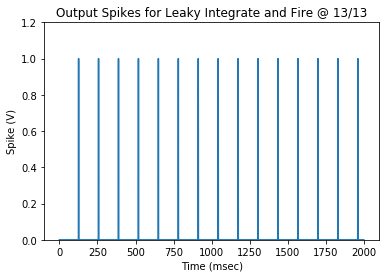

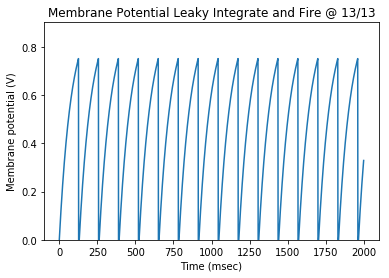

In [53]:
graph.plot_spikes(neurons[ny][nx].time, neurons[ny][nx].spikes, 
            'Output Spikes for {}'.format(neurons[ny][nx].type), neuron_id = '{}/{}'.format(ny, nx))
graph.plot_membrane_potential(neurons[ny][nx].time, neurons[ny][nx].Vm, 
            'Membrane Potential {}'.format(neurons[ny][nx].type), neuron_id = '{}/{}'.format(ny, nx))

## L2: Sum spikes into a neuron in the next layer

Create neurons in layer 2

In [54]:
l2_neurons_x = int(len_x / stride[0])
l2_neurons_y = int(len_y / stride[0])
print ('Creating layer 2 neurons: {} by {}'.format(l2_neurons_y, l2_neurons_x))

Creating layer 2 neurons: 7 by 7


In [55]:
l2_neurons = []

for y in range(l2_neurons_y):
    l2_neuron_row = []
    for x in range(l2_neurons_x):
        l2_neuron_row.append(LIF.LIFNeuron(neuron_label="L2:{}/{}".format(y,x), debug=debug))
    l2_neurons.append(l2_neuron_row)

LIFNeuron(L2:0/0): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:0/1): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:0/2): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:0/3): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:0/4): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:0/5): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:0/6): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:1/0): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:1/1): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:1/2): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:1/3): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:1/4): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:1/5): Created Leaky Integrate and Fire neuron start

Now process by retinal unit (x:x+stride, y:y+stride) and propogate spikes into the 2nd layer

In [56]:
l2_neuron_stimulus = np.zeros((l2_neurons_y, l2_neurons_x, time))

In [57]:
mult_factor = 49           # Number of neurons for each pixel (this is a hack to reduce processing earlier,... 
                          # raise to 49 perhaps later!)
l2x, l2y = 0,0
for ry in range (0, len_y, stride[0]):
    l2x = 0
    for rx in range(0, len_x, stride[0]):       
        stimulus_ret_unit = np.zeros(time)
        print('Generating stimulus for L2 neurons {}/{}'.format(l2y, l2x))
        for ny in range(stride[0]):
            for nx in range(stride[0]):
                x = rx + nx
                y = ry + ny
                stimulus_ret_unit += neurons[y][x].spikes[:time] * mult_factor
        print ('Adding stimulus for l2 neuron {},{}, duration={}\n'.format(l2y, l2x, len(stimulus_ret_unit)))
        l2_neuron_stimulus[l2y,l2x,:] = stimulus_ret_unit
        l2x += 1
    l2y += 1


Generating stimulus for L2 neurons 0/0
Adding stimulus for l2 neuron 0,0, duration=2000

Generating stimulus for L2 neurons 0/1
Adding stimulus for l2 neuron 0,1, duration=2000

Generating stimulus for L2 neurons 0/2
Adding stimulus for l2 neuron 0,2, duration=2000

Generating stimulus for L2 neurons 0/3
Adding stimulus for l2 neuron 0,3, duration=2000

Generating stimulus for L2 neurons 0/4
Adding stimulus for l2 neuron 0,4, duration=2000

Generating stimulus for L2 neurons 0/5
Adding stimulus for l2 neuron 0,5, duration=2000

Generating stimulus for L2 neurons 0/6
Adding stimulus for l2 neuron 0,6, duration=2000

Generating stimulus for L2 neurons 1/0
Adding stimulus for l2 neuron 1,0, duration=2000

Generating stimulus for L2 neurons 1/1
Adding stimulus for l2 neuron 1,1, duration=2000

Generating stimulus for L2 neurons 1/2
Adding stimulus for l2 neuron 1,2, duration=2000

Generating stimulus for L2 neurons 1/3
Adding stimulus for l2 neuron 1,3, duration=2000

Generating stimulus f

In [58]:
# print(l2_neuron_stimulus)

### Run spikes through L2 Neurons

In [59]:
for y in range(l2_neurons_y):
    for x in range(l2_neurons_x):
        print('\nProcessing L2 Neuron {},{} with stimulus length {}'.format(y,x,l2_neuron_stimulus[y][x]))
        l2_neurons[y][x].spike_generator(l2_neuron_stimulus[y][x])


Processing L2 Neuron 0,0 with stimulus length [0. 0. 0. ... 0. 0. 0.]
LIFNeuron.spike_generator(L2:0/0).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(L2:0/0).exit_state(Vm=(2001,) at iteration i=1999, time=1999)

Processing L2 Neuron 0,1 with stimulus length [0. 0. 0. ... 0. 0. 0.]
LIFNeuron.spike_generator(L2:0/1).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(L2:0/1).exit_state(Vm=(2001,) at iteration i=1999, time=1999)

Processing L2 Neuron 0,2 with stimulus length [0. 0. 0. ... 0. 0. 0.]
LIFNeuron.spike_generator(L2:0/2).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(L2:0/2).exit_state(Vm=(2001,) at iteration i=1999, time=1999)

Processing L2 Neuron 0,3 with stimulus length [0. 0. 0. ... 0. 0. 0.]
LIFNeuron.spike_generator(L2:0/3).initial_state(input=(2000,), duration=2000,

### Now graph L2 neurons

Membrane potential

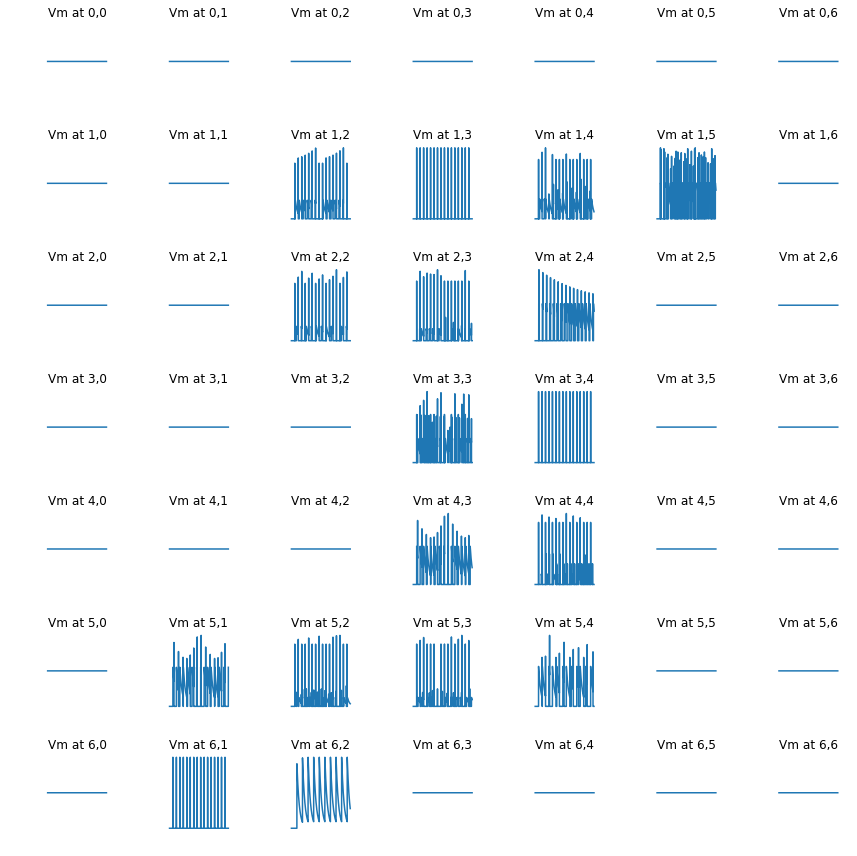

In [60]:
#fig, axes = plt.subplots(ncols=l2_neurons_x, nrows=l2_neurons_y, figsize=(10,10))
fig=plt.figure(figsize=(12,12))
fig.set_tight_layout({5,2,5})

for y in range(l2_neurons_y):
    for x in range(l2_neurons_x):
        index=(y)*l2_neurons_x+x+1
        id = "{}{}{}".format(l2_neurons_y, l2_neurons_x,index)
        a=fig.add_subplot(l2_neurons_y, l2_neurons_x, index)
        a.plot(l2_neurons[y][x].time, l2_neurons[y][x].Vm)
        a.axis('off')
        plt.title('Vm at {},{}'.format(y,x))
        
plt.show()

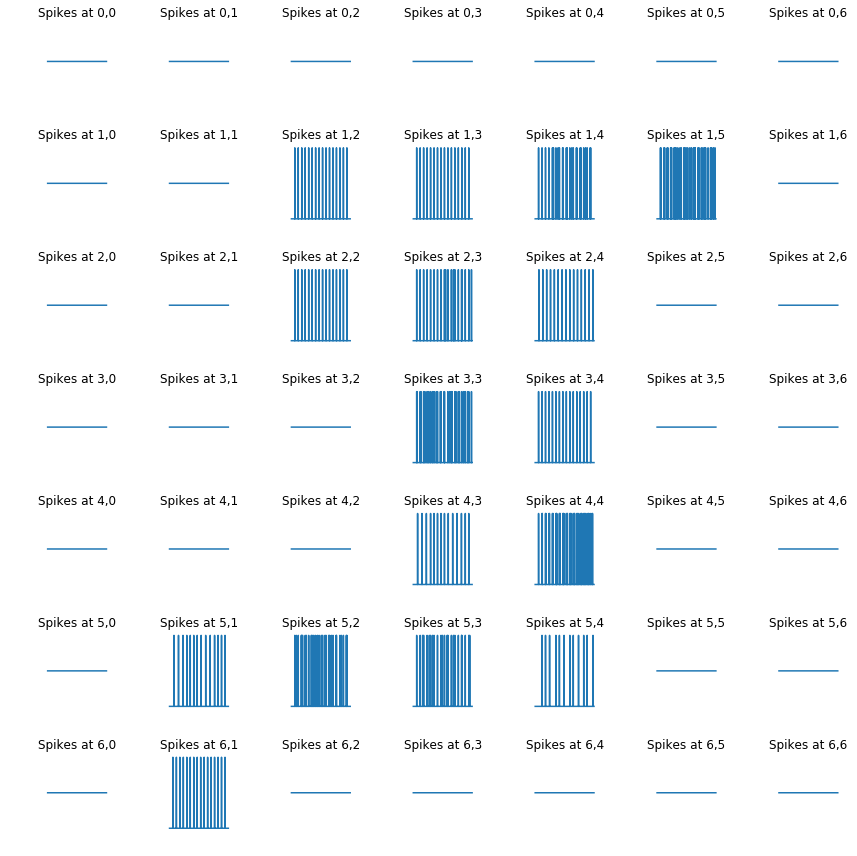

In [61]:
#fig, axes = plt.subplots(ncols=l2_neurons_x, nrows=l2_neurons_y, figsize=(10,10))
fig=plt.figure(figsize=(12,12))
fig.set_tight_layout({5,2,5})

for y in range(l2_neurons_y):
    for x in range(l2_neurons_x):
        index=(y)*l2_neurons_x+x+1
        id = "{}{}{}".format(l2_neurons_y, l2_neurons_x,index)
        a=fig.add_subplot(l2_neurons_y, l2_neurons_x, index)
        a.plot(l2_neurons[y][x].time, l2_neurons[y][x].spikes)
        a.axis('off')
        plt.title('Spikes at {},{}'.format(y,x))
        
plt.show()

In [85]:
##

# L3: Next layer - Flat version


In [86]:
l3_neurons_y = 2
l3_neurons_x = 5
print ('Creating layer 3 neurons: {} by {}'.format(l3_neurons_y, l3_neurons_x))

Creating layer 3 neurons: 2 by 5


In [87]:
l3_neurons = []

for y in range(l3_neurons_y):
    l3_neuron_row = []
    for x in range(l3_neurons_x):
        l3_neuron_row.append(LIF.LIFNeuron(neuron_label="L2:{}/{}".format(y,x), debug=debug))
    l3_neurons.append(l3_neuron_row)

LIFNeuron(L2:0/0): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:0/1): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:0/2): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:0/3): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:0/4): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:1/0): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:1/1): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:1/2): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:1/3): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:1/4): Created Leaky Integrate and Fire neuron starting at time 0


In [88]:
l3_neuron_stimulus = np.zeros((l3_neurons_y, l3_neurons_x, time))

In [89]:
mult_factor =10         # Number of neurons for each pixel (this is a hack to reduce processing earlier,... 
                          # raise to 49 perhaps later!)
l3x, l3y = 0,0
for ry in range (0, l2_neurons_y-1, 3):
    l3x = 0
    for rx in range(0, l2_neurons_x-2, 1):
        #x_end = rx + stride[0]
        #y_end = ry + stride[0]       
        stimulus_ret_unit = np.zeros(time)
        print('Generating stimulus for L3 neurons {}/{}'.format(l3y, l3x))
        for ny in range(3):
            for nx in range(1):
                x = rx + nx
                y = ry + ny
                #print ('Processing stimulus for L1 neuron at {},{}'.format(y,x))
                #print ('Adding stimulus {}'.format(neurons[y][x].spikes[:time]))
                stimulus_ret_unit += l2_neurons[y][x].spikes[:time] * mult_factor
        print ('Adding stimulus for l3 neuron {},{}, duration={}\n'.format(l3y, l3x, len(stimulus_ret_unit)))
        l3_neuron_stimulus[l3y,l3x,:] = stimulus_ret_unit
        l3x += 1
    l3y += 1

Generating stimulus for L3 neurons 0/0
Adding stimulus for l3 neuron 0,0, duration=2000

Generating stimulus for L3 neurons 0/1
Adding stimulus for l3 neuron 0,1, duration=2000

Generating stimulus for L3 neurons 0/2
Adding stimulus for l3 neuron 0,2, duration=2000

Generating stimulus for L3 neurons 0/3
Adding stimulus for l3 neuron 0,3, duration=2000

Generating stimulus for L3 neurons 0/4
Adding stimulus for l3 neuron 0,4, duration=2000

Generating stimulus for L3 neurons 1/0
Adding stimulus for l3 neuron 1,0, duration=2000

Generating stimulus for L3 neurons 1/1
Adding stimulus for l3 neuron 1,1, duration=2000

Generating stimulus for L3 neurons 1/2
Adding stimulus for l3 neuron 1,2, duration=2000

Generating stimulus for L3 neurons 1/3
Adding stimulus for l3 neuron 1,3, duration=2000

Generating stimulus for L3 neurons 1/4
Adding stimulus for l3 neuron 1,4, duration=2000



In [90]:
for y in range(l3_neurons_y):
    for x in range(l3_neurons_x):
        print('\nProcessing L3 Neuron {},{} with stimulus length {}'.format(y,x,l3_neuron_stimulus[y][x]))
        l3_neurons[y][x].spike_generator(l3_neuron_stimulus[y][x])


Processing L3 Neuron 0,0 with stimulus length [0. 0. 0. ... 0. 0. 0.]
LIFNeuron.spike_generator(L2:0/0).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(L2:0/0).exit_state(Vm=(2001,) at iteration i=1999, time=1999)

Processing L3 Neuron 0,1 with stimulus length [0. 0. 0. ... 0. 0. 0.]
LIFNeuron.spike_generator(L2:0/1).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(L2:0/1).exit_state(Vm=(2001,) at iteration i=1999, time=1999)

Processing L3 Neuron 0,2 with stimulus length [0. 0. 0. ... 0. 0. 0.]
LIFNeuron.spike_generator(L2:0/2).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(L2:0/2).exit_state(Vm=(2001,) at iteration i=1999, time=1999)

Processing L3 Neuron 0,3 with stimulus length [0. 0. 0. ... 0. 0. 0.]
LIFNeuron.spike_generator(L2:0/3).initial_state(input=(2000,), duration=2000,

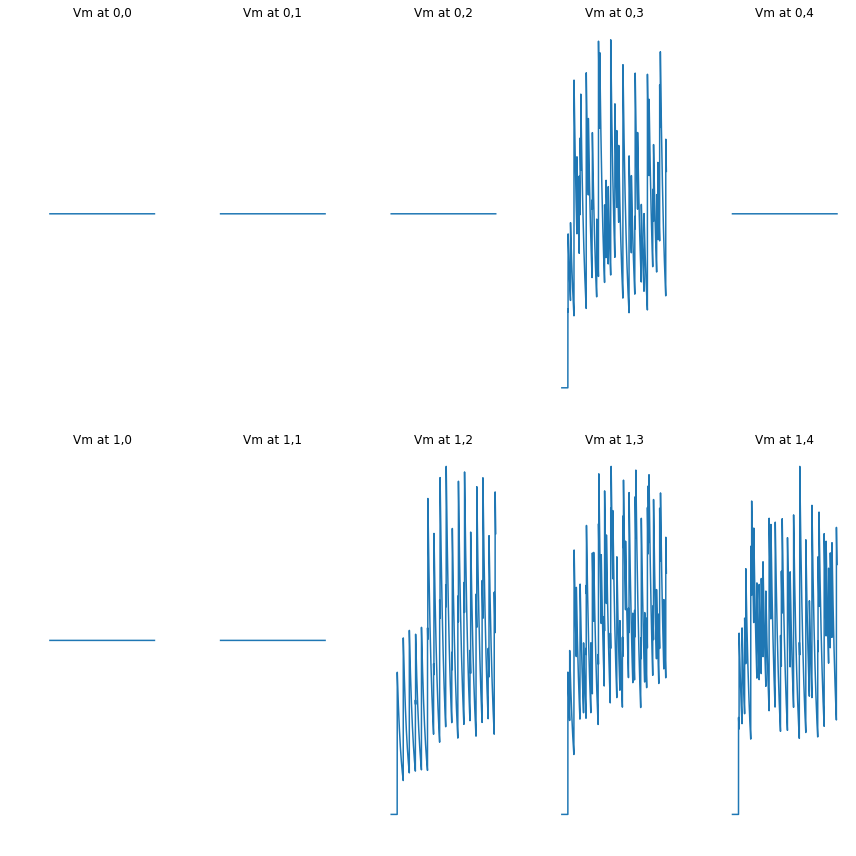

In [91]:
fig=plt.figure(figsize=(12,12))
fig.set_tight_layout({5,2,5})

for y in range(l3_neurons_y):
    for x in range(l3_neurons_x):
        index=(y)*l3_neurons_x+x+1
        id = "{}{}{}".format(l3_neurons_y, l3_neurons_x,index)
        a=fig.add_subplot(l3_neurons_y, l3_neurons_x, index)
        a.plot(l3_neurons[y][x].time, l3_neurons[y][x].Vm)
        a.axis('off')
        plt.title('Vm at {},{}'.format(y,x))
        
plt.show()

## 

# L3: Next layer

In [165]:
l3_neurons_x = int(l2_neurons_x /2)
l3_neurons_y = int(l2_neurons_y / 2)
print ('Creating layer 3 neurons: {} by {}'.format(l3_neurons_y, l3_neurons_x))

Creating layer 3 neurons: 3 by 3


In [151]:
l3_neurons = []

for y in range(l3_neurons_y):
    l3_neuron_row = []
    for x in range(l3_neurons_x):
        l3_neuron_row.append(LIF.LIFNeuron(neuron_label="L2:{}/{}".format(y,x), debug=debug))
    l3_neurons.append(l3_neuron_row)

LIFNeuron(L2:0/0): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:0/1): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:0/2): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:1/0): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:1/1): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:1/2): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:2/0): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:2/1): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:2/2): Created Leaky Integrate and Fire neuron starting at time 0


In [152]:
l3_neuron_stimulus = np.zeros((l3_neurons_y, l3_neurons_x, time))

In [153]:
mult_factor = 9           # Number of neurons for each pixel (this is a hack to reduce processing earlier,... 
                          # raise to 49 perhaps later!)
l3x, l3y = 0,0
for ry in range (0, l2_neurons_y-1, 2):
    l3x = 0
    for rx in range(0, l2_neurons_x-1, 2):
        #x_end = rx + stride[0]
        #y_end = ry + stride[0]       
        stimulus_ret_unit = np.zeros(time)
        print('Generating stimulus for L3 neurons {}/{}'.format(l3y, l3x))
        for ny in range(2):
            for nx in range(2):
                x = rx + nx
                y = ry + ny
                #print ('Processing stimulus for L1 neuron at {},{}'.format(y,x))
                #print ('Adding stimulus {}'.format(neurons[y][x].spikes[:time]))
                stimulus_ret_unit += l2_neurons[y][x].spikes[:time] * mult_factor
        print ('Adding stimulus for l3 neuron {},{}, duration={}\n'.format(l3y, l3x, len(stimulus_ret_unit)))
        l3_neuron_stimulus[l3y,l3x,:] = stimulus_ret_unit
        l3x += 1
    l3y += 1

Generating stimulus for L3 neurons 0/0
Adding stimulus for l3 neuron 0,0, duration=2000

Generating stimulus for L3 neurons 0/1
Adding stimulus for l3 neuron 0,1, duration=2000

Generating stimulus for L3 neurons 0/2
Adding stimulus for l3 neuron 0,2, duration=2000

Generating stimulus for L3 neurons 1/0
Adding stimulus for l3 neuron 1,0, duration=2000

Generating stimulus for L3 neurons 1/1
Adding stimulus for l3 neuron 1,1, duration=2000

Generating stimulus for L3 neurons 1/2
Adding stimulus for l3 neuron 1,2, duration=2000

Generating stimulus for L3 neurons 2/0
Adding stimulus for l3 neuron 2,0, duration=2000

Generating stimulus for L3 neurons 2/1
Adding stimulus for l3 neuron 2,1, duration=2000

Generating stimulus for L3 neurons 2/2
Adding stimulus for l3 neuron 2,2, duration=2000



In [170]:
for y in range(l3_neurons_y):
    for x in range(l3_neurons_x):
        print('\nProcessing L3 Neuron {},{} with stimulus length {}'.format(y,x,l3_neuron_stimulus[y][x]))
        l3_neurons[y][x].spike_generator(l3_neuron_stimulus[y][x])


Processing L3 Neuron 0,0 with stimulus length [0. 0. 0. ... 0. 0. 0.]
LIFNeuron.spike_generator(L2:0/0).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(L2:0/0).exit_state(Vm=(2001,) at iteration i=1999, time=1999)

Processing L3 Neuron 0,1 with stimulus length [0. 0. 0. ... 0. 0. 0.]
LIFNeuron.spike_generator(L2:0/1).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(L2:0/1).exit_state(Vm=(2001,) at iteration i=1999, time=1999)

Processing L3 Neuron 0,2 with stimulus length [0. 0. 0. ... 0. 0. 0.]
LIFNeuron.spike_generator(L2:0/2).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(L2:0/2).exit_state(Vm=(2001,) at iteration i=1999, time=1999)

Processing L3 Neuron 0,3 with stimulus length [0. 0. 0. ... 0. 0. 0.]
LIFNeuron.spike_generator(L2:0/3).initial_state(input=(2000,), duration=2000,

# Run spikes through L3

In [154]:
for y in range(l3_neurons_y):
    for x in range(l3_neurons_x):
        print('\nProcessing L3 Neuron {},{} with stimulus length {}'.format(y,x,l3_neuron_stimulus[y][x]))
        l3_neurons[y][x].spike_generator(l3_neuron_stimulus[y][x])


Processing L3 Neuron 0,0 with stimulus length [0. 0. 0. ... 0. 0. 0.]
LIFNeuron.spike_generator(L2:0/0).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(L2:0/0).exit_state(Vm=(2001,) at iteration i=1999, time=1999)

Processing L3 Neuron 0,1 with stimulus length [0. 0. 0. ... 0. 0. 0.]
LIFNeuron.spike_generator(L2:0/1).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(L2:0/1).exit_state(Vm=(2001,) at iteration i=1999, time=1999)

Processing L3 Neuron 0,2 with stimulus length [0. 0. 0. ... 0. 0. 0.]
LIFNeuron.spike_generator(L2:0/2).initial_state(input=(2000,), duration=2000, initial Vm=0.0, t=0, debug=True)
OUR CODEEEEEE
LIFNeuron.spike_generator(L2:0/2).exit_state(Vm=(2001,) at iteration i=1999, time=1999)

Processing L3 Neuron 1,0 with stimulus length [0. 0. 0. ... 0. 0. 0.]
LIFNeuron.spike_generator(L2:1/0).initial_state(input=(2000,), duration=2000,

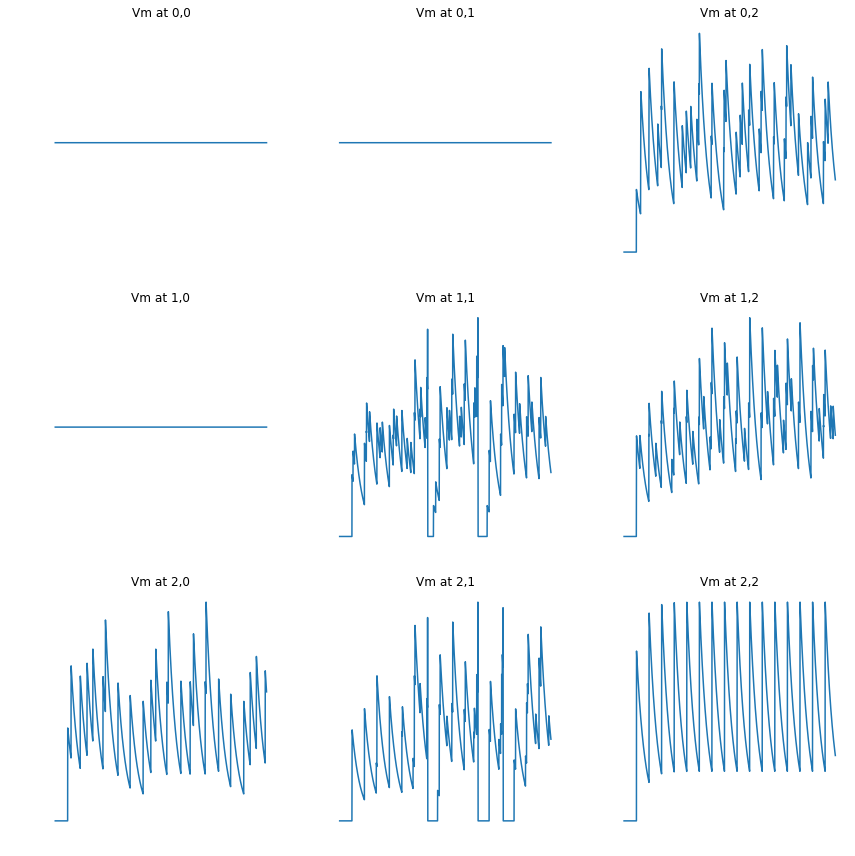

In [155]:
#fig, axes = plt.subplots(ncols=l2_neurons_x, nrows=l2_neurons_y, figsize=(10,10))
fig=plt.figure(figsize=(12,12))
fig.set_tight_layout({5,2,5})

for y in range(l3_neurons_y):
    for x in range(l3_neurons_x):
        index=(y)*l3_neurons_x+x+1
        id = "{}{}{}".format(l3_neurons_y, l3_neurons_x,index)
        a=fig.add_subplot(l3_neurons_y, l3_neurons_x, index)
        a.plot(l3_neurons[y][x].time, l3_neurons[y][x].Vm)
        a.axis('off')
        plt.title('Vm at {},{}'.format(y,x))
        
plt.show()